In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/remote-work-productivity/remote_work_productivity.csv')


In [3]:
df.head()

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74


In [4]:
df.shape

(1000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employee_ID            1000 non-null   int64 
 1   Employment_Type        1000 non-null   object
 2   Hours_Worked_Per_Week  1000 non-null   int64 
 3   Productivity_Score     1000 non-null   int64 
 4   Well_Being_Score       1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.isnull().sum()

Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64

There is no null values present in the DataSet

In [8]:
df.duplicated().sum()

0

No Duplicates in the Dataset

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


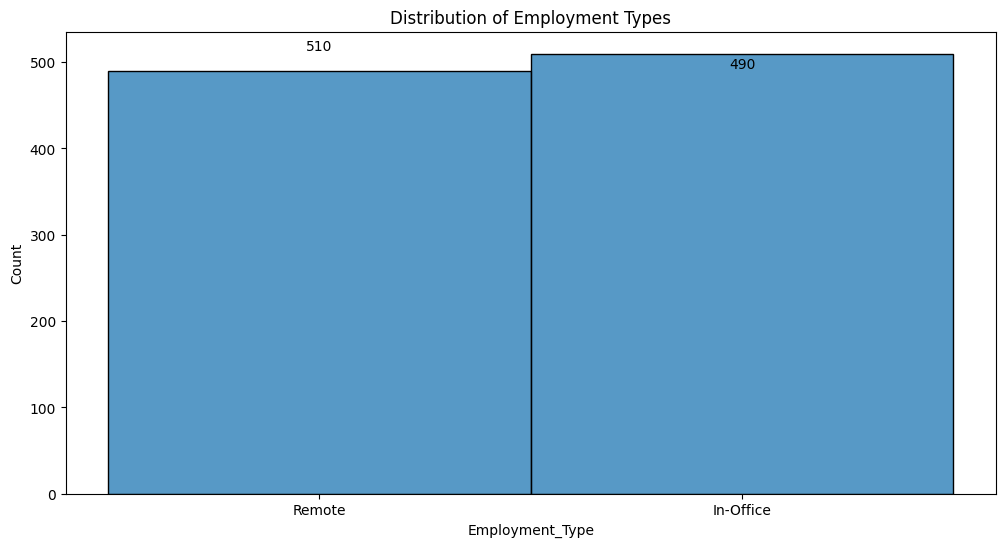

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Employment_Type', data=df)
plt.title('Distribution of Employment Types')


counts = df['Employment_Type'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)


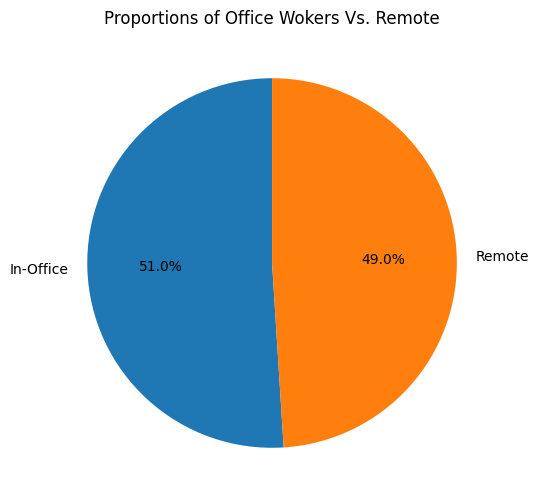

In [24]:
#Proportions of Office Wokers Vs. Remote
dftype=df['Employment_Type']

count=dftype.value_counts()
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90)
plt.title('Proportions of Office Wokers Vs. Remote')
plt.show()

**#  From the above graph , we can see the more people are working in remorte**

Text(0.5, 1.0, ' EmployeeId vs Hours of Work')

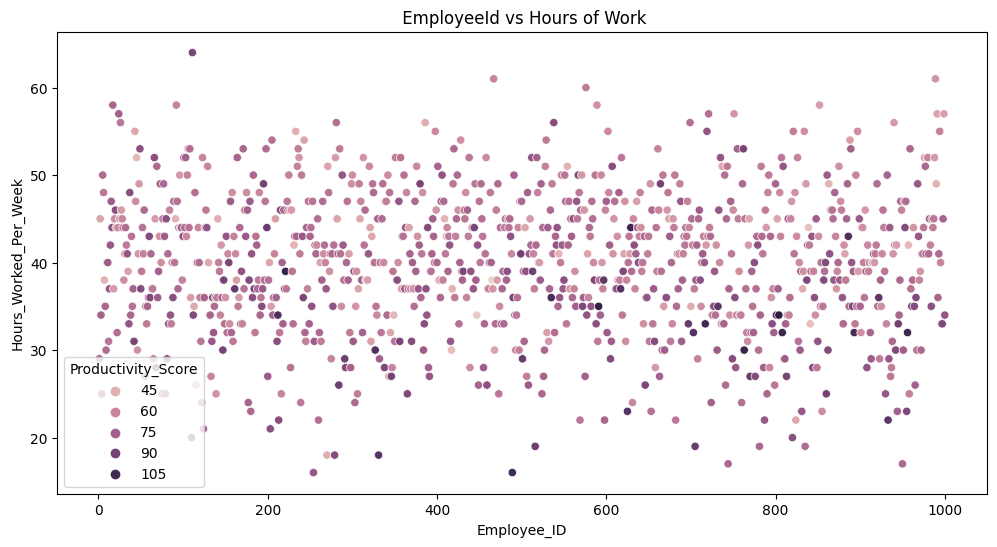

In [15]:
#Realtion between EmployeeId vs Hours of Work
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Employee_ID',y='Hours_Worked_Per_Week',hue='Productivity_Score')
plt.xlabel('Employee_ID')
plt.ylabel('Hours_Worked_Per_Week')
plt.title(' EmployeeId vs Hours of Work')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Employment_Type  vs Productivity_Score')

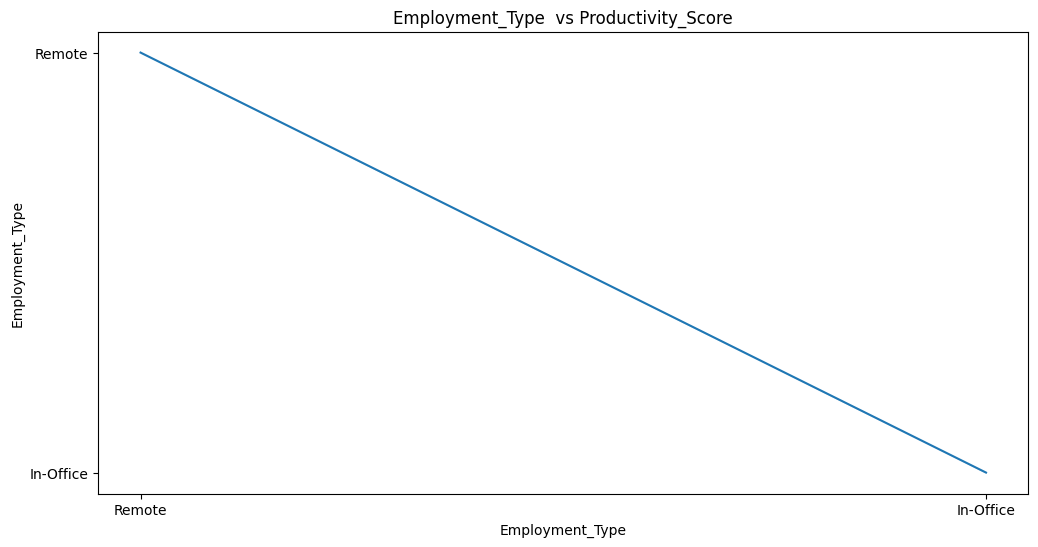

In [19]:
#Realtion between  Employment_Type  vs Productivity_Score
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Employment_Type',y='Employment_Type')
plt.xlabel('Employment_Type')
plt.ylabel('Employment_Type')
plt.title('Employment_Type  vs Productivity_Score')

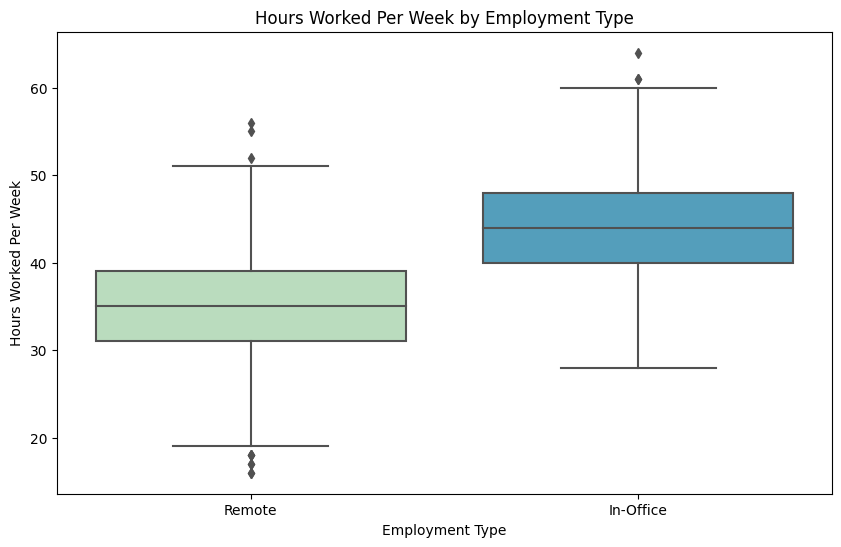

In [25]:
#Hours Worked Per Week by Employment Type
plt.figure(figsize=(10,6))
sns.boxplot(x='Employment_Type',y='Hours_Worked_Per_Week',data=df,palette='GnBu')
plt.title('Hours Worked Per Week by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Hours Worked Per Week')
plt.show()

Productivity score is high , when the person is working from remote location

<Axes: >

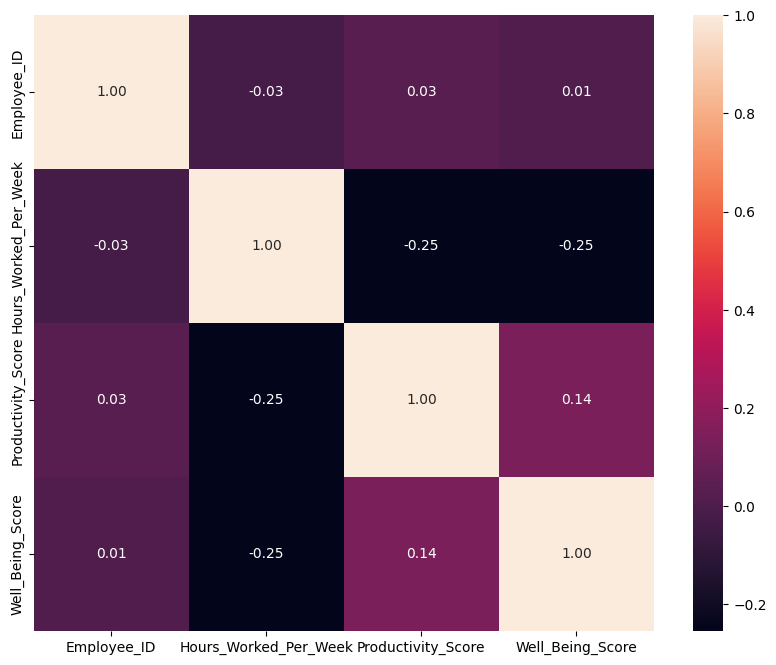

In [23]:
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(number.corr(),annot=True, fmt='.2f')

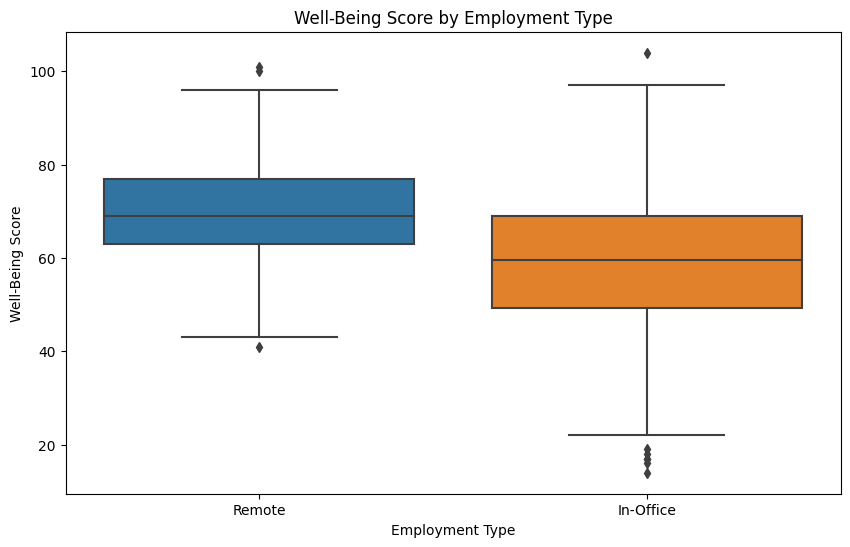

In [26]:
# Well-Being Score by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Type', y='Well_Being_Score', data=df)
plt.title('Well-Being Score by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Well-Being Score')
plt.show()

Conclusion
Our analysis reveals key insights into how remote and in-office work environments impact productivity and well-being:

Productivity: Remote workers tend to have higher productivity scores on average compared to in-office workers.
Well-Being: Remote workers also report higher well-being scores, indicating a potential benefit of remote work on overall satisfaction.
These findings suggest that remote work might offer advantages in both productivity and well-being, although further investigation is needed to confirm these trends.